In [52]:
!pip install librosa
!pip install SpeechRecognition


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [53]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


In [54]:
audio = 'crowd_train/wavs'
df = pd.read_csv('crowd_train/raw_crowd_train.tsv', sep="\t")

In [55]:
# update path of files
audio_dir = Path("crowd_train") / "wavs"

df["audio_path"] = df["audio_path"].apply(
    lambda p: str(audio_dir / Path(p).name)
)
df.head()

,hash_id,audio_path,duration,annotator_emo,golden_emo,annotator_id,speaker_text,speaker_emo,source_id
0,475e76f77ac1ed7cabafca740b15b32a,crowd_train/wavs/475e76f77ac1ed7cabafca740b15b...,2.453000,angry,NaN,858305a5450b7bd1288ba0053b1cd1c1,не надо не надо не надо не надо,angry,fa136da095807ea6cd18dd6e2f58d4d0
1,2f9438ef68395c70a8714dc373a49d11,crowd_train/wavs/2f9438ef68395c70a8714dc373a49...,4.640000,neutral,NaN,858305a5450b7bd1288ba0053b1cd1c1,фозил кори mp три,neutral,3d436884cbbe25373914f8768de494f7
2,9937036a9c0dba20eecbffddd00f2be2,crowd_train/wavs/9937036a9c0dba20eecbffddd00f2...,4.341750,neutral,2.0,858305a5450b7bd1288ba0053b1cd1c1,NaN,NaN,NaN
3,fb0ae78586a235018103acec22a80a8f,crowd_train/wavs/fb0ae78586a235018103acec22a80...,3.900562,neutral,NaN,858305a5450b7bd1288ba0053b1cd1c1,сколько стоит на керамбит,neutral,80bc833cf6b3f106d2e8991783a31e2b
4,196dcf9e1aaac46c2aee45e7f6adfb92,crowd_train/wavs/196dcf9e1aaac46c2aee45e7f6adf...,4.780000,neutral,NaN,858305a5450b7bd1288ba0053b1cd1c1,афина когда закончится эта телепередача,neutral,bd78f079676fa5f1ed17253c9a440cc6


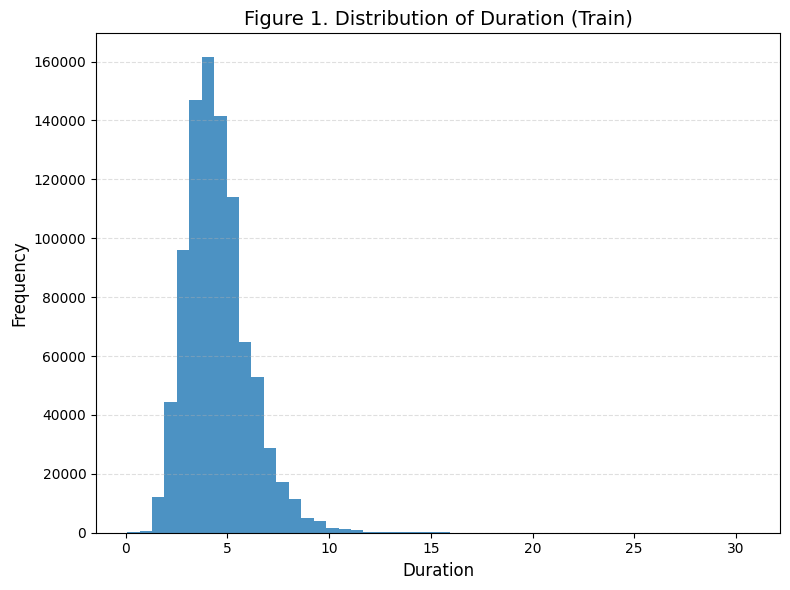

In [56]:
# Plot histogram of duration
plt.figure(figsize=(8, 6))
plt.hist(df['duration'], bins=50, alpha=0.8)
plt.title('Figure 1. Distribution of Duration (Train)', fontsize=14)
plt.xlabel('Duration', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

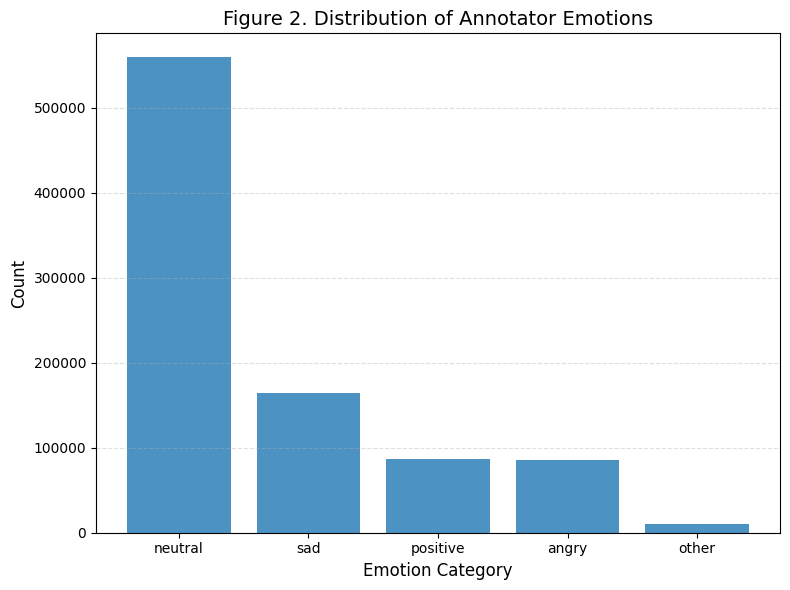

In [57]:
# Distribution of classes
counts = df['annotator_emo'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(counts.index, counts.values, alpha=0.8)
plt.title('Figure 2. Distribution of Annotator Emotions', fontsize=14)
plt.xlabel('Emotion Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [58]:
# Comparing two files
row_neutral = df[df["annotator_emo"] == "neutral"].iloc[0]
print(row_neutral["annotator_emo"], row_neutral["hash_id"])
row_angry = df[df["annotator_emo"] == "angry"].iloc[0]
print(row_angry["annotator_emo"], row_angry["hash_id"])

audio_neutral, sr_neutral = librosa.load(row_neutral['audio_path'])
audio_angry, sr_angry = librosa.load(row_angry['audio_path'])

neutral 2f9438ef68395c70a8714dc373a49d11
angry 475e76f77ac1ed7cabafca740b15b32a


### Waveform

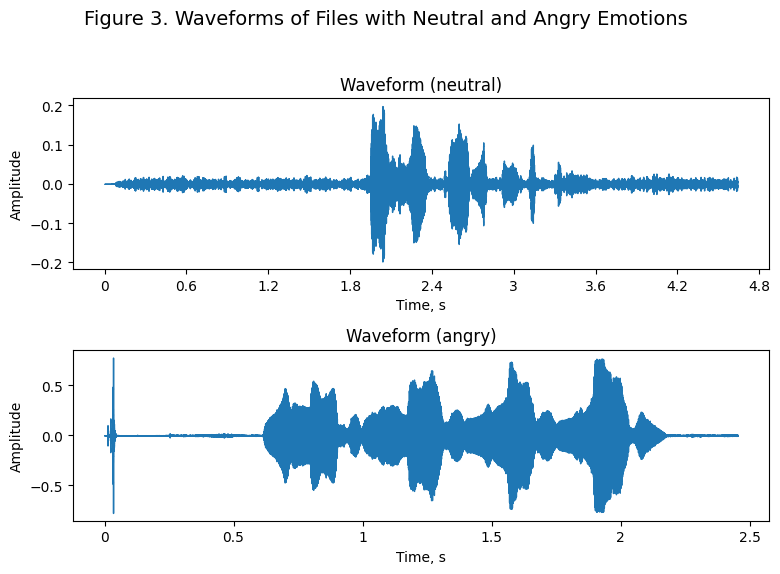

In [59]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6))
librosa.display.waveshow(audio_neutral, sr=sr_neutral, ax=axes[0])
axes[0].set_title('Waveform (neutral)')
axes[0].set_xlabel('Time, s')
axes[0].set_ylabel('Amplitude')

librosa.display.waveshow(audio_angry, sr=sr_angry, ax=axes[1])
axes[1].set_title('Waveform (angry)')
axes[1].set_xlabel('Time, s')
axes[1].set_ylabel('Amplitude')

fig.suptitle('Figure 3. Waveforms of Files with Neutral and Angry Emotions', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Spectrogram

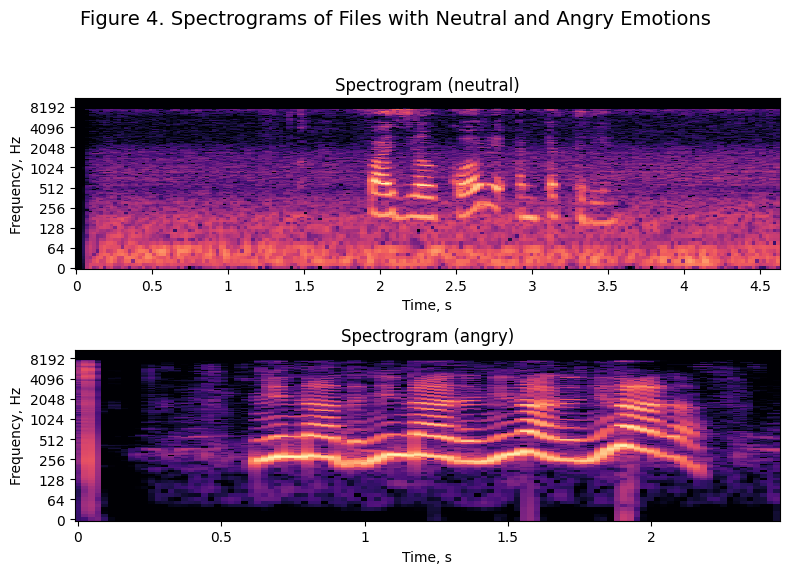

In [60]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6))
stft_neutral = np.abs(librosa.stft(audio_neutral))
librosa.display.specshow(
    librosa.amplitude_to_db(stft_neutral, ref=np.max),
    y_axis='log', x_axis='time', ax=axes[0]
)
axes[0].set_title('Spectrogram (neutral)')
axes[0].set_xlabel('Time, s')
axes[0].set_ylabel('Frequency, Hz')

stft_angry = np.abs(librosa.stft(audio_angry))
librosa.display.specshow(
    librosa.amplitude_to_db(stft_angry, ref=np.max),
    y_axis='log', x_axis='time', ax=axes[1]
)
axes[1].set_title('Spectrogram (angry)')
axes[1].set_xlabel('Time, s')
axes[1].set_ylabel('Frequency, Hz')

fig.suptitle('Figure 4. Spectrograms of Files with Neutral and Angry Emotions', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Mel-spectrogram

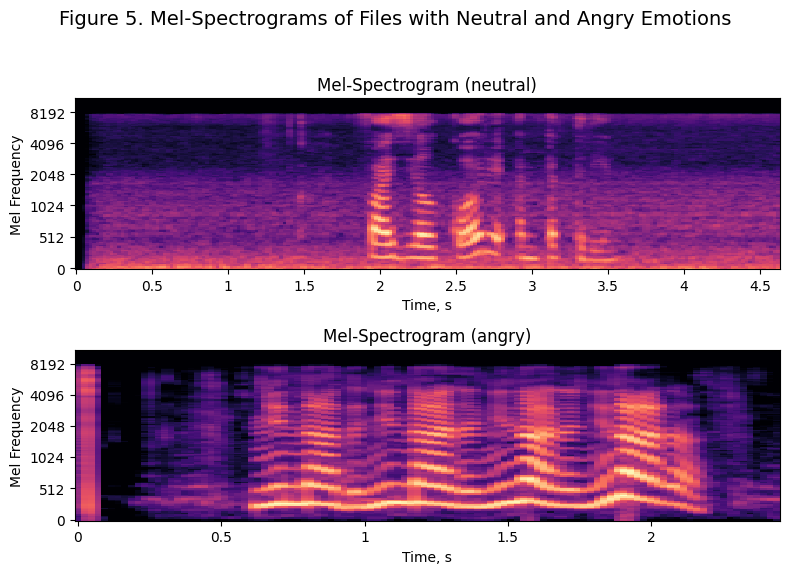

In [61]:
mel_neutral = librosa.feature.melspectrogram(y=audio_neutral, sr=sr_neutral, n_mels=128)
mel_angry = librosa.feature.melspectrogram(y=audio_angry,   sr=sr_angry,   n_mels=128)

mel_neutral_db = librosa.power_to_db(mel_neutral, ref=np.max)
mel_angry_db = librosa.power_to_db(mel_angry, ref=np.max)

fig, axes = plt.subplots(2, 1, figsize=(8, 6))

librosa.display.specshow(mel_neutral_db, sr=sr_neutral, x_axis='time', y_axis='mel', ax=axes[0])
axes[0].set_title('Mel-Spectrogram (neutral)')
axes[0].set_xlabel('Time, s')
axes[0].set_ylabel('Mel Frequency')

librosa.display.specshow(mel_angry_db, sr=sr_angry, x_axis='time', y_axis='mel', ax=axes[1])
axes[1].set_title('Mel-Spectrogram (angry)')
axes[1].set_xlabel('Time, s')
axes[1].set_ylabel('Mel Frequency')

fig.suptitle('Figure 5. Mel-Spectrograms of Files with Neutral and Angry Emotions', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Speech Recognition


In [62]:
import speech_recognition as sr

In [63]:
def transcribe_audio_speech_recognition(audio_path, language="ru-RU", use_google=True):
    recognizer = sr.Recognizer()
    with sr.AudioFile(audio_path) as source:
        audio_data = recognizer.record(source)
    try:
        if use_google:
            text = recognizer.recognize_google(audio_data, language=language)
        else:
            text = recognizer.recognize_sphinx(audio_data, language="ru-RU")
    except sr.UnknownValueError:
        text = "Unknown speech"
    except sr.RequestError as e:
        text = f"Error: {e}"
    return text.strip()

## Preprocess

In [64]:
# removing rows with annotator emo - other
df = df[df['annotator_emo'] != 'other'].reset_index(drop=True)

In [65]:
# extracting 125k rows wit equal distribution among classes
df = df[:150000]

print(df['annotator_emo'].value_counts())

annotator_emo
neutral     69714
angry       34168
positive    28087
sad         18031
Name: count, dtype: int64


# Build features

In [66]:
from tqdm import tqdm
from joblib import Parallel, delayed

In [67]:
# extract features function
def extract_features(path):
    data, sr = librosa.load(path)

    mfcc = librosa.feature.mfcc(
        y=data,
        sr=sr,
        n_mfcc=13,
        n_fft=min(2048, len(data)),
        hop_length=min(512, len(data)//4),
    )
    
    width = min(9, mfcc.shape[1])
    if width % 2 == 0:
        width -= 1
    width = max(width, 1)

    mfcc_delta = librosa.feature.delta(mfcc, order=1, width=width)
    def agg(x):
        return np.mean(x, axis=1)

    features = np.hstack([
        agg(mfcc),
        agg(mfcc_delta),
    ])

    return features

In [68]:
# extract features
features = Parallel(n_jobs=-1)(delayed(extract_features)(audio_path) for audio_path in tqdm(df['audio_path']))

# added features
df_features = pd.DataFrame(features, columns=[f'mfcc_{i}' for i in range(1, 27)], index=df.index)
df = pd.concat([df, df_features], axis=1)
df.head()

100%|██████████| 150000/150000 [04:32<00:00, 550.45it/s]


,hash_id,audio_path,duration,annotator_emo,golden_emo,annotator_id,speaker_text,speaker_emo,source_id,mfcc_1,...,mfcc_17,mfcc_18,mfcc_19,mfcc_20,mfcc_21,mfcc_22,mfcc_23,mfcc_24,mfcc_25,mfcc_26
0,475e76f77ac1ed7cabafca740b15b32a,crowd_train/wavs/475e76f77ac1ed7cabafca740b15b...,2.453000,angry,NaN,858305a5450b7bd1288ba0053b1cd1c1,не надо не надо не надо не надо,angry,fa136da095807ea6cd18dd6e2f58d4d0,-298.668427,...,-0.616994,0.560479,-0.619041,0.302222,-0.188770,-0.140909,-0.092123,-0.026516,0.019394,-0.105596
1,2f9438ef68395c70a8714dc373a49d11,crowd_train/wavs/2f9438ef68395c70a8714dc373a49...,4.640000,neutral,NaN,858305a5450b7bd1288ba0053b1cd1c1,фозил кори mp три,neutral,3d436884cbbe25373914f8768de494f7,-412.333435,...,0.015786,-0.065628,0.191174,-0.040630,0.121660,-0.000895,0.137632,0.005554,0.005812,0.058386
2,9937036a9c0dba20eecbffddd00f2be2,crowd_train/wavs/9937036a9c0dba20eecbffddd00f2...,4.341750,neutral,2.0,858305a5450b7bd1288ba0053b1cd1c1,NaN,NaN,NaN,-518.794800,...,0.217076,-0.355967,0.121843,-0.252647,-0.001364,-0.168094,-0.049897,-0.043852,-0.132755,-0.063314
3,fb0ae78586a235018103acec22a80a8f,crowd_train/wavs/fb0ae78586a235018103acec22a80...,3.900562,neutral,NaN,858305a5450b7bd1288ba0053b1cd1c1,сколько стоит на керамбит,neutral,80bc833cf6b3f106d2e8991783a31e2b,-418.947968,...,-0.232958,0.057506,0.003006,0.106879,0.057588,-0.017382,0.032716,-0.008243,0.012223,0.028860
4,196dcf9e1aaac46c2aee45e7f6adfb92,crowd_train/wavs/196dcf9e1aaac46c2aee45e7f6adf...,4.780000,neutral,NaN,858305a5450b7bd1288ba0053b1cd1c1,афина когда закончится эта телепередача,neutral,bd78f079676fa5f1ed17253c9a440cc6,-578.417969,...,0.079505,-0.016535,0.064919,0.024630,-0.049768,0.000370,0.005385,0.019575,0.092966,0.051535


In [69]:
df.to_csv('final_dataframe.csv', index=None, header=True)